<img src="https://uwe-cyber.github.io/images/uwe_banner.png">

# UFCFEL-15-3 Security Data Analytics and Visualisation
## Portfolio Assignment: Part 1
### Academic year: 2024-25

## Conduct a security investigation on web traffic from an organisation
---

For this task, the company UWEtech have enlisted your support as a security data analyst. They believe that they have suffered an attack on their network, however they are unable to diagnose what has happened exactly. The company have provided you with an extract of their network traffic, for which you will use visualisation techniques to learn more about the underlying activity on their systems.

**Dataset:** You will be issued a dataset for this task via GitLab: https://gitlab.uwe.ac.uk/a23-mccarthy/sdav-2024

**This exercise carries a weight of 25% towards your overall portfolio submission**

It is strongly encouraged that you use the online reference guides for [Matplotlib](https://matplotlib.org/) and [pandas](https://pandas.pydata.org/) - searching the API documentation will answer many of your questions.


### Submission Documents
---

For Part 1 of your portfolio, your complete output file should be saved as:

- **STUDENT_ID-PART1.ipynb**

This should then be included in a ZIP file along with your other two portfolio documents.

The deadline for all portfolio submissions is **THURSDAY 15th MAY @ 14:00**. 

In [1]:
### Load in the libraries and the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

def load_csv_data():
    data = pd.read_csv('./part1/packet-capture3.csv')
    return data

data = load_csv_data()
data = data[ data['Source'].isin(data['Source'].value_counts().head(30).index) ] 
data = data.drop('No.', axis=1)
data

,Time,Source,Destination,Protocol,Length,Info
0,0.000000,10.20.0.165,209.85.143.19,TCP,62,1698 > 443 [SYN] Seq=0 Win=65535 Len=0 MSS=1...
1,0.017691,209.85.143.19,10.20.0.165,TCP,62,"443 > 1698 [SYN, ACK] Seq=0 Ack=1 Win=5720 L..."
2,0.017729,10.20.0.165,209.85.143.19,TCP,54,1698 > 443 [ACK] Seq=1 Ack=1 Win=65535 Len=0
3,0.018382,10.20.0.165,209.85.143.19,SSLv3,156,Client Hello
4,0.032859,209.85.143.19,10.20.0.165,TCP,60,443 > 1698 [ACK] Seq=1 Ack=103 Win=5720 Len=0
...,...,...,...,...,...,...
9380,833.452154,10.20.0.165,10.20.0.130,SMB,180,"Tree Connect AndX Request, Path: \\\\WIN-JIDID..."
9382,833.458302,10.20.0.165,10.20.0.130,SMB,130,"Trans2 Request, GET_DFS_REFERRAL, File:"
9384,833.557382,10.20.0.165,10.20.0.130,SMB,156,"Trans2 Request, GET_DFS_REFERRAL, File: \\bhra..."
9386,833.558091,10.20.0.165,10.20.0.130,SMB,148,"Trans2 Request, GET_DFS_REFERRAL, File: \\BHRA..."


---


### Question 1: Plot a Line Chart that clearly depicts "Seconds" on the x-axis, and "Total Number of Packets" sent on the y-axis, complete with axis labeling. 

#### (4 marks)

*Hint: The time is given in seconds with millisecond precision - think how you could aggregate this value to represent seconds only, then research a function that counts the value totals in your data.*

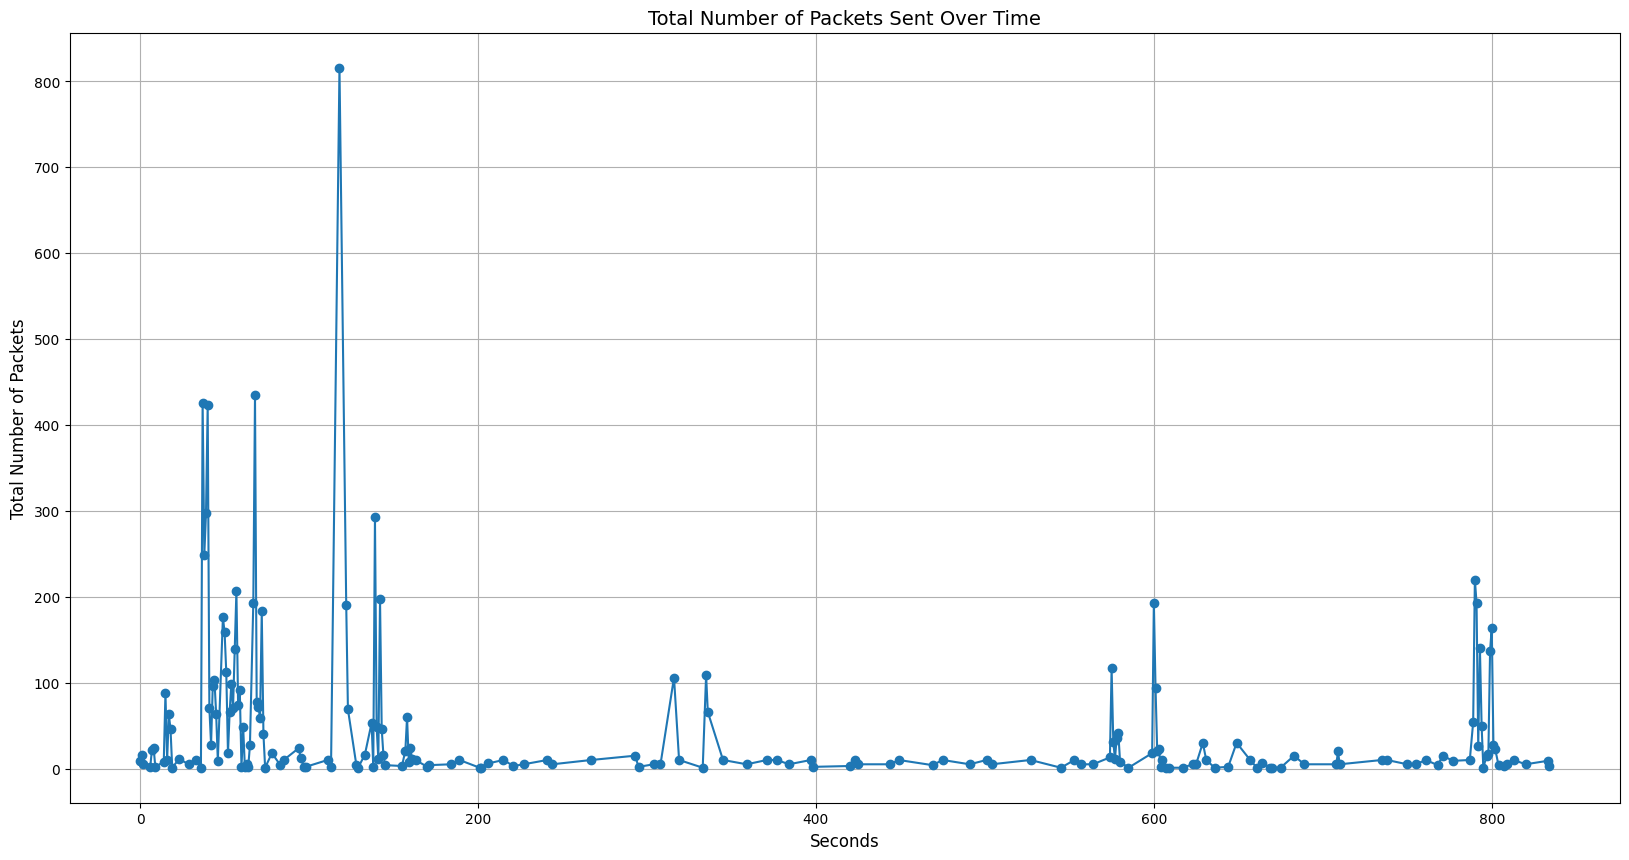

In [2]:
data['Seconds'] = data['Time'].astype(float).round()

packets_per_second = data.groupby('Seconds').size()

plt.figure(figsize=(20, 10))
plt.plot(packets_per_second.index, packets_per_second.values, marker='o', linestyle='-')
plt.title('Total Number of Packets Sent Over Time', fontsize=14)
plt.xlabel('Seconds', fontsize=12)
plt.ylabel('Total Number of Packets', fontsize=12)
plt.grid(True)
plt.show()

### Question 2: Display a Bar Chart that shows "Protocol" on the x-axis, and "Count" on the y-axis, complete with axis labeling. 
#### (2 marks)

*Hint: Search the pandas documentation for creating a Bar Chart from a DataFrame column.*

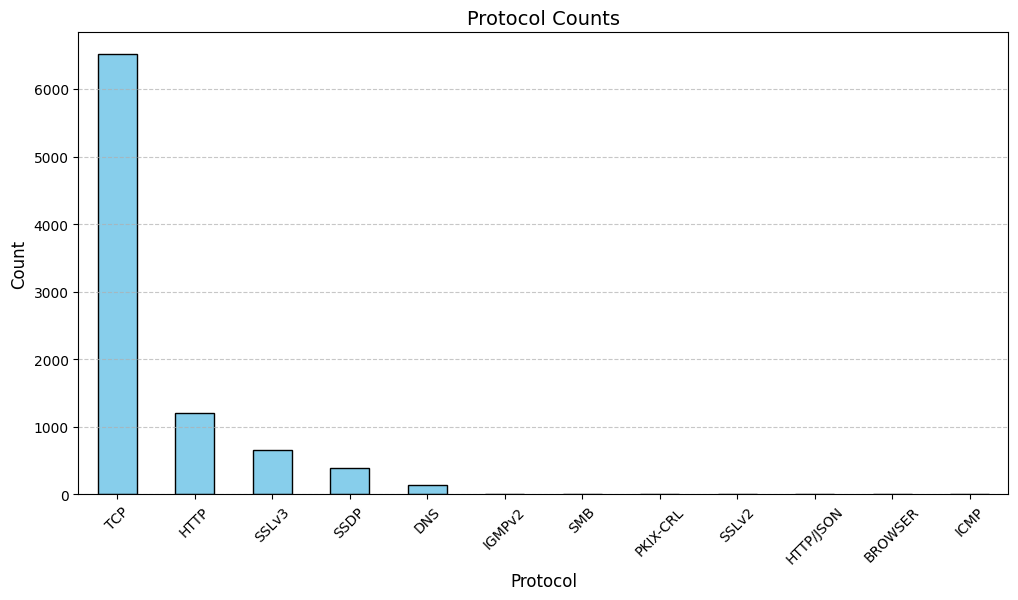

In [3]:
protocol_counts = data['Protocol'].value_counts()

plt.figure(figsize=(12, 6))
protocol_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Protocol Counts', fontsize=14)
plt.xlabel('Protocol', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Question 3: Display a Scatter Chart that shows the association between Source and Destination data. 

#### (2 marks)
*Hint: Matplotlib has a scatterplot function that takes x and y as inputs*

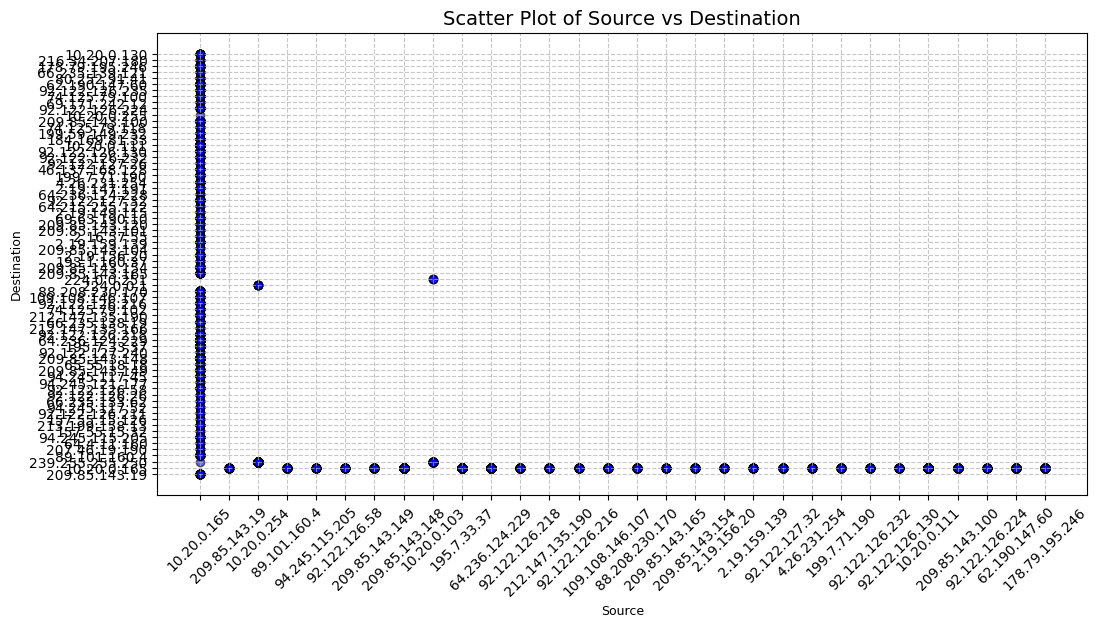

In [4]:
# Create a scatter plot for Source and Destination
plt.figure(figsize=(12, 6))
plt.scatter(data['Source'], data['Destination'], alpha=0.6, color='blue', edgecolor='black')
plt.title('Scatter Plot of Source vs Destination', fontsize=14)
plt.xlabel('Source', fontsize=9)
plt.ylabel('Destination', fontsize=9)
plt.xticks(rotation=45, fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Question 4: Display the data as a node link diagram using Source and Destination as your edges. 

#### (3 marks)

*Hint: Look at the NetworkX library: https://networkx.org/ and the online course notes.*

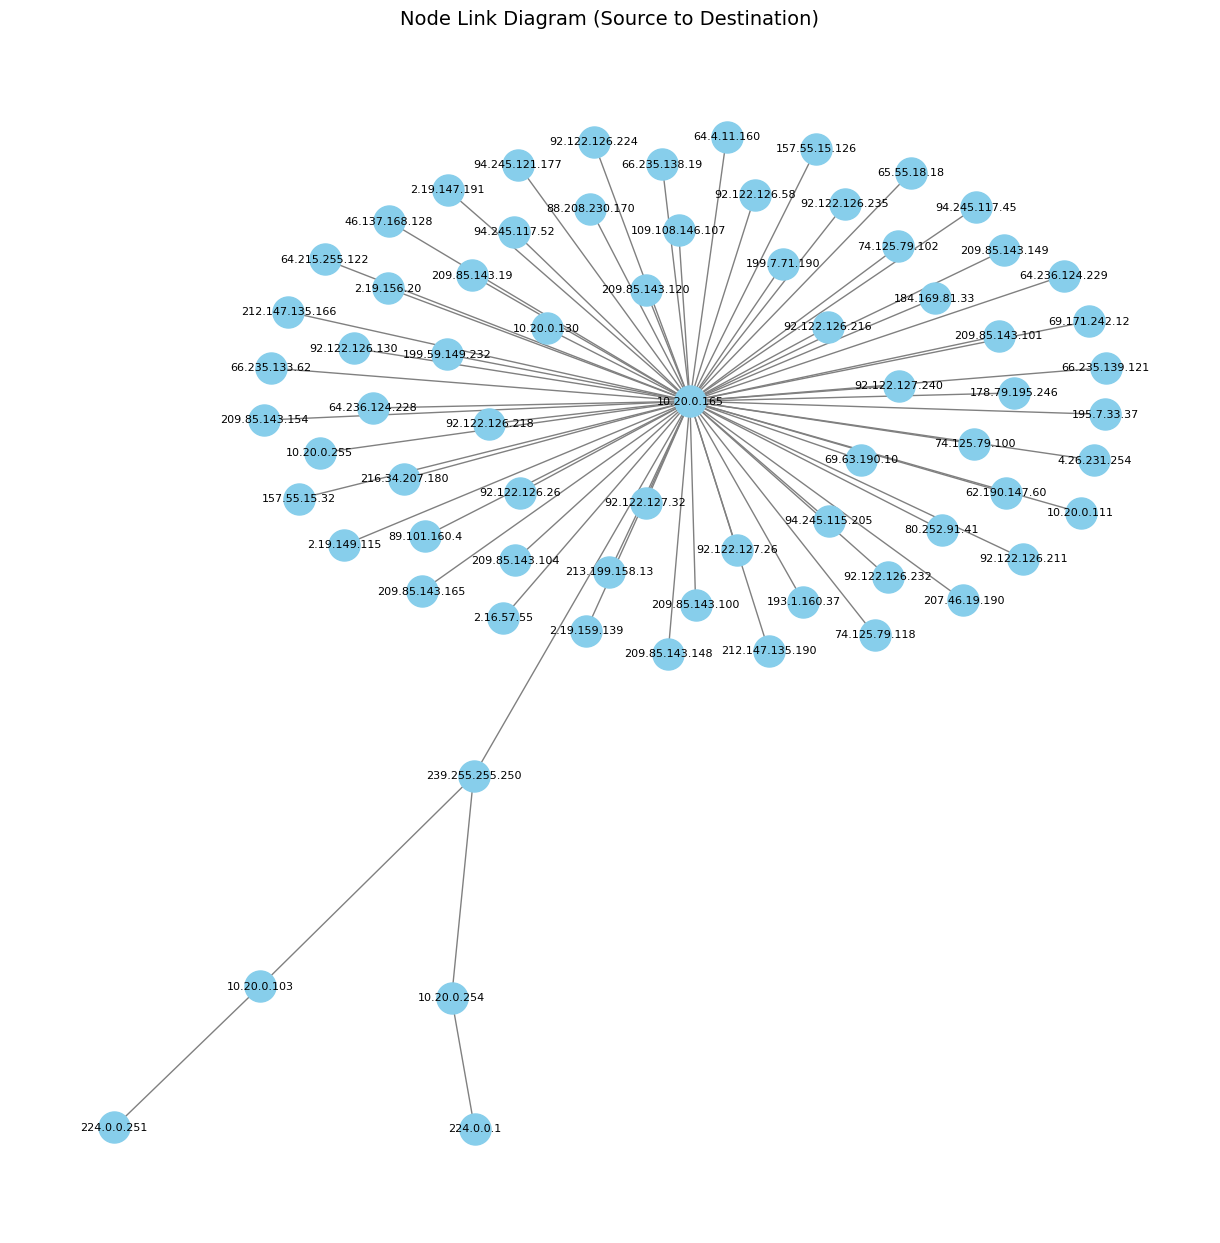

In [5]:
G = nx.from_pandas_edgelist(data, source='Source', target='Destination')

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.3)  # Positioning the nodes
nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', edge_color='gray', font_size=8)
plt.title('Node Link Diagram (Source to Destination)', fontsize=14)
plt.show()

### Question 5: For each Protocol type, create a new Column and assign whether the Protocol usage is True or False 

#### (2 marks)
Hint: Get a list of unique protocol values, assign each value to be a new column where the Protocol column is equal to the Protocol name.

In [6]:
######### ADD YOUR CODE HERE ##########
unique_protocols = data['Protocol'].unique()

for protocol in unique_protocols:
    data[protocol] = data['Protocol'] == protocol

data.head()

,Time,Source,Destination,Protocol,Length,Info,Seconds,TCP,SSLv3,SSDP,DNS,HTTP,HTTP/JSON,IGMPv2,SSLv2,PKIX-CRL,BROWSER,ICMP,SMB
0,0.000000,10.20.0.165,209.85.143.19,TCP,62,1698 > 443 [SYN] Seq=0 Win=65535 Len=0 MSS=1...,0.0,True,False,False,False,False,False,False,False,False,False,False,False
1,0.017691,209.85.143.19,10.20.0.165,TCP,62,"443 > 1698 [SYN, ACK] Seq=0 Ack=1 Win=5720 L...",0.0,True,False,False,False,False,False,False,False,False,False,False,False
2,0.017729,10.20.0.165,209.85.143.19,TCP,54,1698 > 443 [ACK] Seq=1 Ack=1 Win=65535 Len=0,0.0,True,False,False,False,False,False,False,False,False,False,False,False
3,0.018382,10.20.0.165,209.85.143.19,SSLv3,156,Client Hello,0.0,False,True,False,False,False,False,False,False,False,False,False,False
4,0.032859,209.85.143.19,10.20.0.165,TCP,60,443 > 1698 [ACK] Seq=1 Ack=103 Win=5720 Len=0,0.0,True,False,False,False,False,False,False,False,False,False,False,False


### Question 6: Show a Multi-Line Chart that shows the Total Number of Packets Per Protocol on the y-axis and "Seconds" on the x-axis. You should display a legend that states the colour of each protocol.

#### (6 marks)
*Hint: Think about how you did this in Question 1 , and recall that plt.plot can be used to append to an existing plot.*

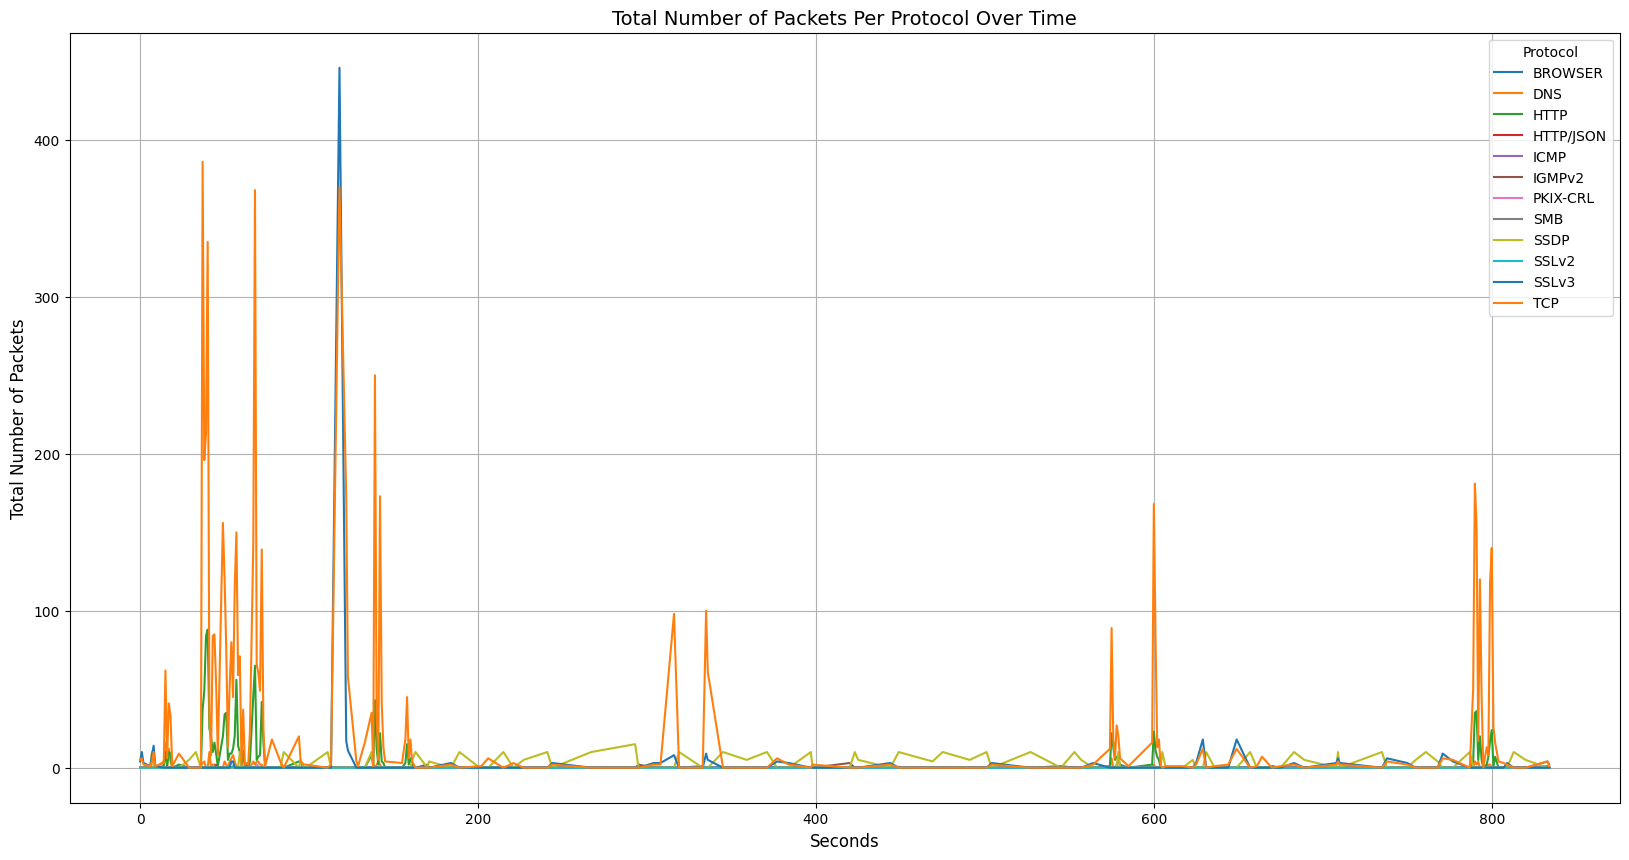

In [7]:
# ANSWER
packets_per_protocol = data.groupby(['Seconds', 'Protocol']).size().unstack(fill_value=0)

plt.figure(figsize=(20, 10))
for protocol in packets_per_protocol.columns:
    plt.plot(packets_per_protocol.index, packets_per_protocol[protocol], label=protocol)

plt.title('Total Number of Packets Per Protocol Over Time', fontsize=14)
plt.xlabel('Seconds', fontsize=12)
plt.ylabel('Total Number of Packets', fontsize=12)
plt.legend(title='Protocol', fontsize=10)
plt.grid(True)
plt.show()

### Question 7: Describe what you believe are the key findings of each plot, including discussion of any stand-out features. Give justification for your answer in the context of a security scenario. Limit your response to a maximum of 200 words.

#### (6 marks)

1. **Line Chart (Question 1)**: The line chart shows the total number of packets sent over time. Peaks in the chart indicate bursts of activity, which could be normal (e.g., file transfers) or suspicious (e.g., potential DDoS attacks). For example, a sudden spike in traffic might suggest an anomaly worth investigating.

2. **Bar Chart (Question 2)**: The bar chart highlights the distribution of protocols. The dominance of certain protocols (e.g., TCP or SSLv3) is expected in typical network traffic. However, the presence of less common protocols (e.g., DHCPv6 or ARP) with high counts could indicate unusual activity or misconfigurations.

3. **Scatter Plot (Question 3)**: The scatter plot visualizes the relationship between Source and Destination. Clusters of points suggest frequent communication between specific IPs, which may represent normal operations. However, outliers or unexpected connections could indicate unauthorized access or malicious activity.

4. **Node Link Diagram (Question 4)**: The node link diagram reveals the structure of the network. Highly connected nodes may represent critical devices or servers. Unexpected connections between nodes could indicate lateral movement by an attacker or unauthorized devices on the network.

5. **Multi-Line Chart (Question 6)**: The multi-line chart shows the activity of each protocol over time. Protocols with sudden spikes in activity (e.g., SSLv3) may indicate abnormal usage patterns, such as encrypted data exfiltration or malicious communication.

Security Context: These visualizations collectively help identify anomalies, such as unusual traffic patterns, unexpected protocol usage, or suspicious connections. Such insights are critical for detecting and mitigating potential security threats like DDoS attacks, unauthorized access, or malware communication.